In [23]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 200)  # Adjust this number as needed
pd.set_option('display.max_columns', 50)  # Adjust this number as needed

In [20]:
import os
# List all files in the folder
folder_path = '../../data_CityEvent/processed/1.5.4_avg_visits_across_day_of_week_at_cbgid_hour_of_day/'
file_names = os.listdir(folder_path)

# file_names.remove('unscheduled_intermediate') 
# file_names.remove('archive_before_dropping_missing_geometry') 
for file_name in file_names:
    print(file_name)

avg_visits_attended_community_hourly_visits.csv
avg_visits_attended_concerts_hourly_visits.csv
avg_visits_attended_conferences_hourly_visits.csv
avg_visits_attended_expos_hourly_visits.csv
avg_visits_attended_festivals_hourly_visits.csv
avg_visits_attended_performing-arts_hourly_visits.csv
avg_visits_attended_sports_hourly_visits.csv
avg_visits_non_attended_academic_hourly_visits.csv
avg_visits_non_attended_daylight-savings_hourly_visits.csv
avg_visits_non_attended_observances_hourly_visits.csv
avg_visits_non_attended_politics_hourly_visits.csv
avg_visits_non_attended_public-holidays_hourly_visits.csv
avg_visits_non_attended_school-holidays_hourly_visits.csv
avg_visits_unscheduled_airport-delays_hourly_visits.csv
avg_visits_unscheduled_disasters_hourly_visits.csv
avg_visits_unscheduled_health-warnings_hourly_visits.csv
avg_visits_unscheduled_severe-weather_hourly_visits.csv
avg_visits_unscheduled_terror_hourly_visits.csv


In [21]:
import os
import pandas as pd
for file_name in file_names:
    current_df = pd.read_csv(os.path.join(folder_path, file_name))
    current_df.reset_index(drop=True, inplace=True)
    print(f'{file_name}: {current_df.shape}')

    display(current_df.head())
    
    break
    

avg_visits_attended_community_hourly_visits.csv: (11164, 6)


,DAY_OF_WEEK,START_HOUR,BGFIPS,TOTAL_VISITS,AVG_VISITS,EVENTS_COUNT
0,Friday,0,60014229002,7.0,2.333333,3
1,Friday,0,60330013003,0.0,0.000000,4
2,Friday,0,60371252002,2.0,2.000000,1
3,Friday,0,60372032002,0.0,0.000000,1
4,Friday,0,60372374012,0.0,0.000000,1


In [26]:
df = pd.read_csv('../../data_CityEvent/processed/1.5.4_avg_visits_across_day_of_week_at_cbgid_hour_of_day/avg_visits_attended_community_hourly_visits.csv')
display(df.head())

,DAY_OF_WEEK,START_HOUR,BGFIPS,TOTAL_VISITS,AVG_VISITS,EVENTS_COUNT
0,Friday,0,60014229002,7.0,2.333333,3
1,Friday,0,60330013003,0.0,0.000000,4
2,Friday,0,60371252002,2.0,2.000000,1
3,Friday,0,60372032002,0.0,0.000000,1
4,Friday,0,60372374012,0.0,0.000000,1


In [28]:
df['EVENTS_COUNT'].describe()

count    11164.000000
mean        12.920906
std         58.959474
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max       2402.000000
Name: EVENTS_COUNT, dtype: float64

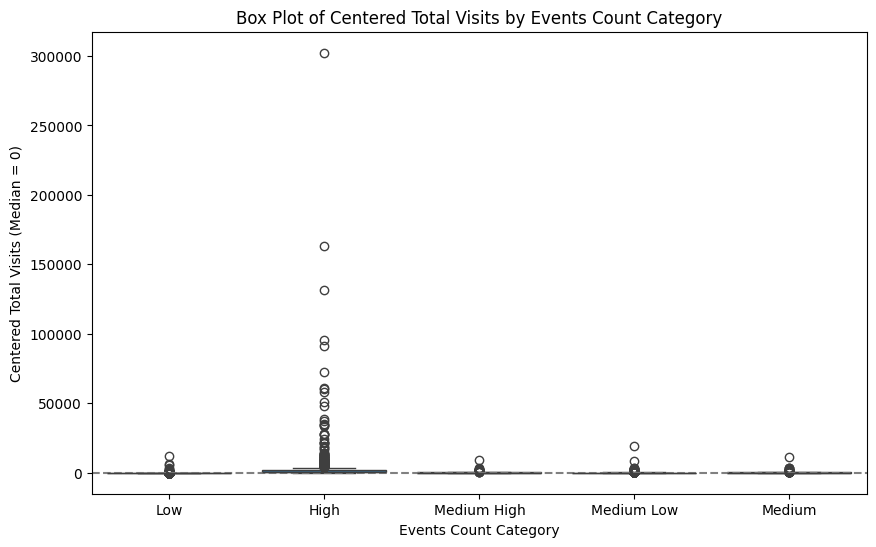

In [37]:
def categorize_events_count(row):
    if row < 5:
        return 'Low'
    elif row < 10:
        return 'Medium Low'
    elif row < 15:
        return 'Medium'
    elif row < 25:
        return 'Medium High'
    else:
        return 'High'

df['EVENTS_CATEGORY'] = df['EVENTS_COUNT'].apply(categorize_events_count)

# Step 2: Center TOTAL_VISITS around its median
median_visits = df['TOTAL_VISITS'].median()
df['TOTAL_VISITS_CENTERED'] = df['TOTAL_VISITS'] - median_visits

# Step 3: Create the Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='EVENTS_CATEGORY', y='TOTAL_VISITS_CENTERED', data=df)
plt.title('Box Plot of Centered Total Visits by Events Count Category')
plt.xlabel('Events Count Category')
plt.ylabel('Centered Total Visits (Median = 0)')
plt.axhline(0, color='gray', linestyle='--')  # Optional: Add a line at y=0
plt.show()